# Telco Churn Prediction

 "Memprediksi perilaku untuk mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus." [https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=voteCount]

## -- Understanding the Business Problem -- ##

1. Berapa banyak pelanggan yang bergabung selama kuartal terakhir ?
2. berapa banyak pelanggan yang churn atau pindah ? dan kenapa pindah/ tidak berlangganan lagi (bisa kita cek korelasi yang pindah dengan kolom" lain)
3. berapa banyak pelanggan bernilai tinggi atau sudah lama berlanggan pindah ?
4. berapa % pelanggan churn dan pelanggan yang tetap menggunakan layanan aktif ?
5. Apakah ada pola di Pelanggan Churn berdasarkan jenis kelamin?
6. Apakah ada pola/preferensi di Pelanggan Churn berdasarkan jenis layanan yang diberikan?
7. Apa jenis layanan yang paling menguntungkan?
8. Fitur dan layanan mana yang paling menguntungkan?

## -- Data Understanding --

- customerID : ID Pelanggan
- gender : Apakah pelanggan adalah pria atau wanita
- SeniorCitizen : Apakah pelanggan adalah pelangan lama atau bukan (1, 0)
- Partner : Apakah pelanggan memiliki pasangan atau tidak (Yes, No)
- Dependents : Apakah pelanggan memiliki tanggungan atau tidak (Yes, No)
- tenure : Jumlah bulan pelanggan telah bergabung dengan perusahaan
- PhoneService : Apakah pelanggan memiliki layanan telepon atau tidak (Yes, No)
- MultipleLines : Apakah pelanggan memiliki banyak jalur atau tidak (Yes, No, No phone service)
- InternetService : Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
- OnlineSecurity : Apakah pelanggan memiliki keamanan online atau tidak (Yes, No, No internet service)
- OnlineBackup : Apakah pelanggan memiliki cadangan online atau tidak (Yes, No, No internet service)
- DeviceProtection : Apakah pelanggan memiliki perlindungan perangkat atau tidak (Yes, No, No internet service)
- TechSupport : Apakah pelanggan memiliki dukungan teknis atau tidak (Yes, No, No internet service)
- StreamingTV : Apakah pelanggan memiliki TV streaming atau tidak (Yes, No, No internet service)
- StreamingMovies : Apakah pelanggan memiliki film streaming atau tidak (Yes, No, No internet service)
- Contract : Jangka waktu kontrak pelanggan (Month-to-month, One year, Two year)
- PaperlessBilling : Apakah pelanggan memiliki penagihan tanpa kertas atau tidak (Yes, No)
- PaymentMethod : Metode pembayaran pelanggan (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Jumlah yang dibebankan kepada pelanggan setiap bulan
- TotalCharges : Jumlah total yang dibebankan kepada pelanggan
- Churn : Apakah pelanggan pindah berlangganan atau tidak (Yes or No)

## -- Data Preparation --

### Import Library

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.feature_importance import mean_score_decrease
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
plt.style.use("fivethirtyeight")
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

### Get Data

In [86]:
df = pd.read_csv("Data/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df.shape

(7043, 21)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cheking Missing Value

In [89]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [90]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [91]:
# menghapus data yang kosong ' ' di TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df[df['TotalCharges'] == ' ']
df.dropna(subset=['TotalCharges'], inplace=True)

In [92]:
# merubah type data TotalCharges menjadi numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [93]:
# deskripsi data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [94]:
# cek data target yang ada apakah imbalance atau tidak
round(df['Churn'].value_counts(normalize=True)*100,2)

No     73.42
Yes    26.58
Name: Churn, dtype: float64

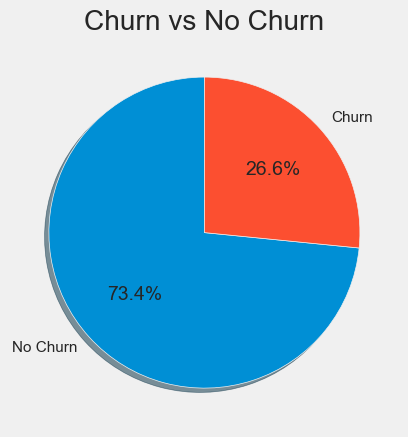

In [138]:
# membuat pie chart untuk mengetahui jumlah churn dan tidak churn
plt.pie(df['Churn'].value_counts(), labels=['No Churn','Churn'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Churn vs No Churn')
plt.show()

data terlihat imbalance, karena value "No" sebesar 73.46% dan "Yes" sebesar 26.54%, nanti akan kita coba prediksi tanpa sampling ulang target kita. jika terasa akurasinya jele maka kita lakukan under sampling

In [96]:
# ubah data target menjadi 0 dan 1, jika Churn/Yes = 1 maka target = 1, jika Tidak Churn/NO = 0 maka target = 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [97]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [98]:
df2 = df.copy()
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [99]:
# convert data kategorikal menjadi numerik
df2 = pd.get_dummies(df2, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                   'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [100]:
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


C:\Users\Silent Monster\AppData\Local\Temp\ipykernel_9820\3975246524.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


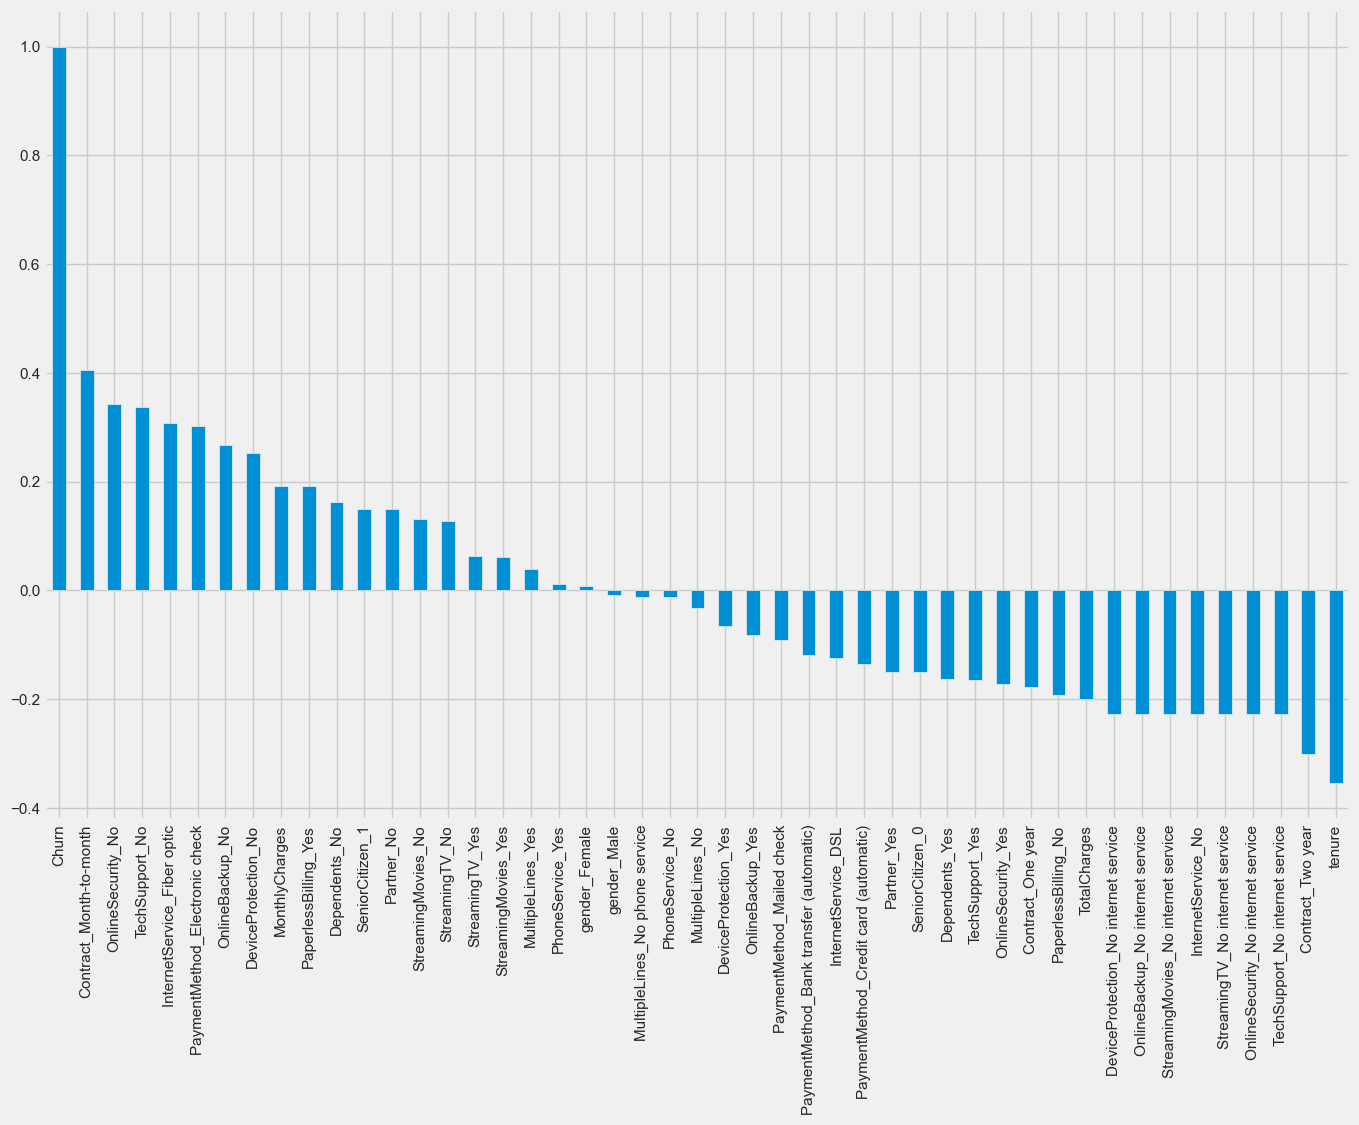

In [101]:
# cari corelation antara "Churn" dengan kolom lainya
plt.figure(figsize=(15,10))
df2.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

Contract_Month_to_month, online_security_No dan tech_support_No, Payment_method, Online_backup_No tampaknya berkorelasi positif dengan Churn.
Menariknya kolom seperti  Online_security_Yes, Streaming TV, Online Backup dll. Tidak ada korelasi  dengan Churn/ berkorelasi negatif.
kita coba mengeksplorasi data tersebut dengan menggunakan visualisasi.

### EDA (Exploratory Data Analysis)

#### Demographics - Pertama-tama, mari kita pahami jenis kelamin, rentang usia, patner, dan status tanggungan pelanggan

Partner and dependent status - Sekitar 50% nasabah memiliki pasangan, sementara hanya 30% dari total nasabah yang memiliki tanggungan.

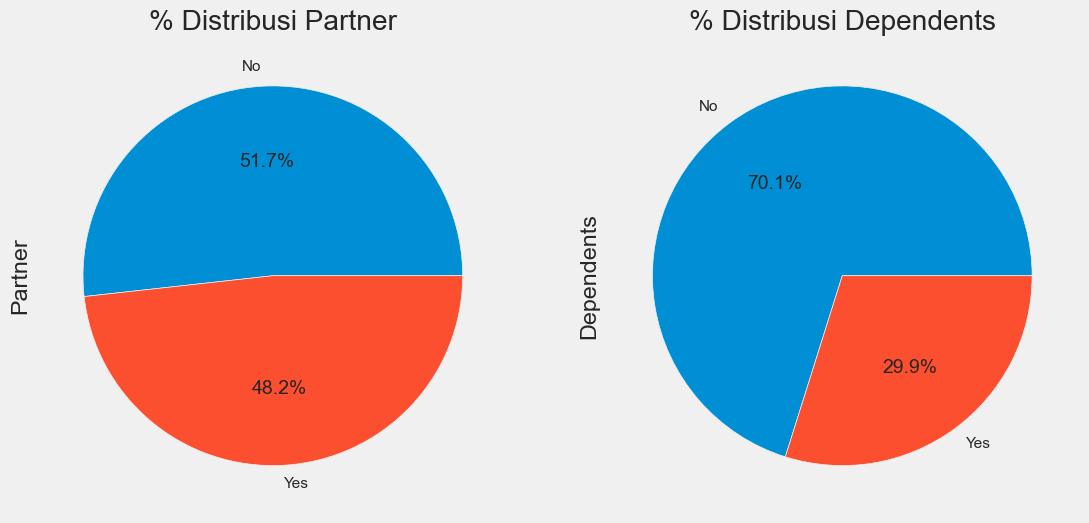

In [102]:
# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafik Distribusi Partner
axs[0].pie(round(df['Partner'].value_counts(normalize=True)*100,2), autopct='%1.1f%%', labels=['No', 'Yes'])
axs[0].set_ylabel('Partner')
axs[0].set_title('% Distribusi Partner')

# Grafik Distribusi Dependents
axs[1].pie(round(df['Dependents'].value_counts(normalize=True)*100,2), autopct='%1.1f%%', labels=['No', 'Yes'])
axs[1].set_ylabel('Dependents')
axs[1].set_title('% Distribusi Dependents')

# Menampilkan grafik
plt.show()

Yang menarik adalah melihat persentase pelanggan yang memiliki pasangan dan juga memiliki tanggungan.

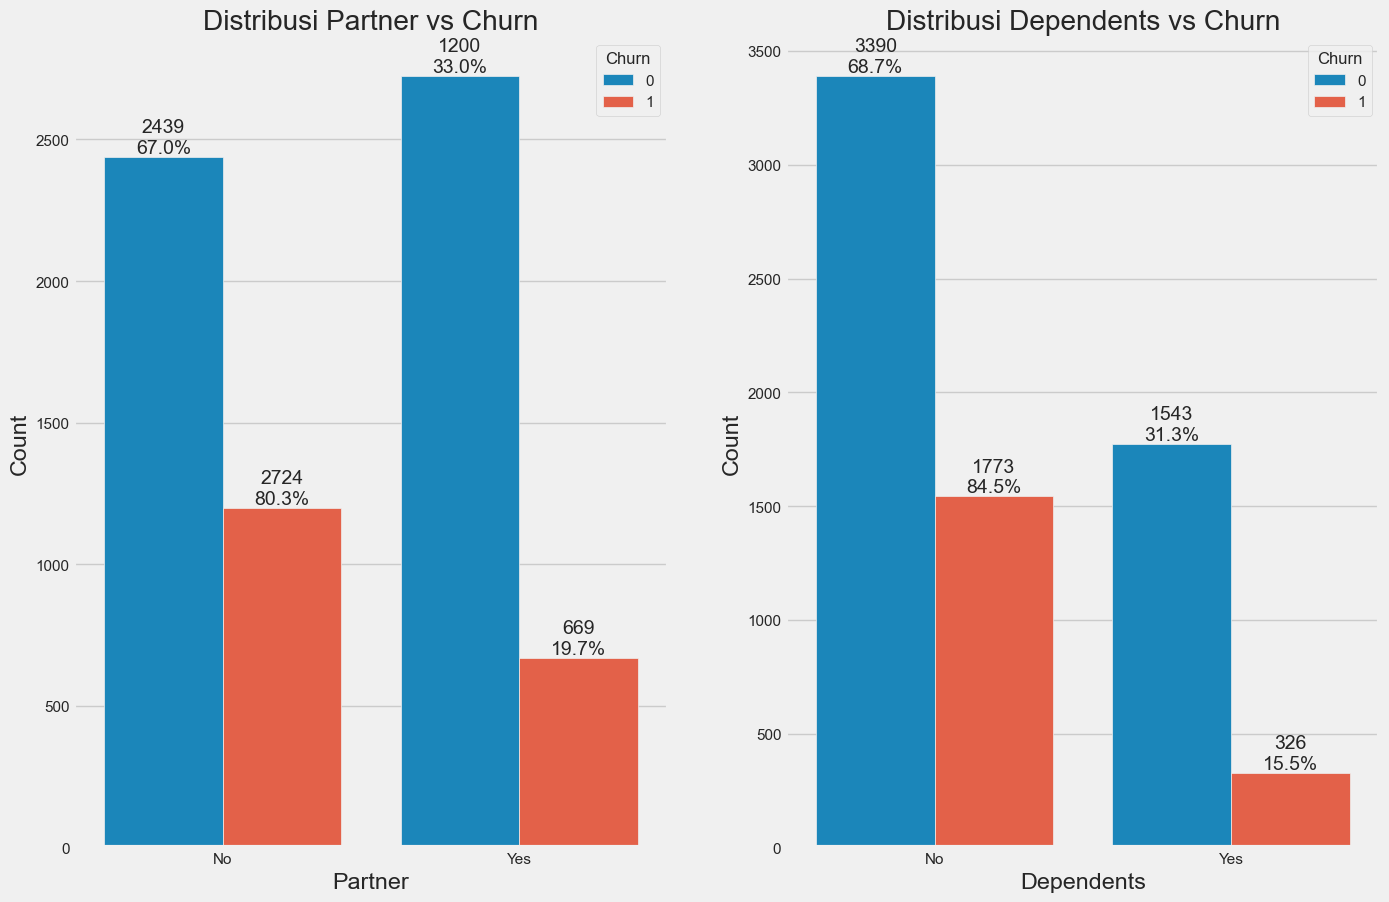

In [103]:
# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Grafik Partner vs Churn
axs[0].set_title('Distribusi Partner vs Churn')
partner_churn_count = df.groupby(['Partner', 'Churn']).size().reset_index(name='Count')
partner_churn_percent = df.groupby('Partner')['Churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
sns.barplot(x='Partner', y='Count', hue='Churn', data=partner_churn_count, ax=axs[0])
for i, p in enumerate(axs[0].patches):
    count = partner_churn_count.iloc[i]['Count']
    percent = partner_churn_percent.iloc[i]['Percent']
    axs[0].annotate(f"{count}\n{percent:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Grafik Dependents vs Churn
axs[1].set_title('Distribusi Dependents vs Churn')
dependents_churn_count = df.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
dependents_churn_percent = df.groupby('Dependents')['Churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
sns.barplot(x='Dependents', y='Count', hue='Churn', data=dependents_churn_count, ax=axs[1])
for i, p in enumerate(axs[1].patches):
    count = dependents_churn_count.iloc[i]['Count']
    percent = dependents_churn_percent.iloc[i]['Percent']
    axs[1].annotate(f"{count}\n{percent:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Menampilkan grafik
plt.show()

- Nasabah yang tinggal bersama Mitra lebih sedikit melakukan churn dibandingkan dengan nasabah yang tidak tinggal bersama Mitra.
- Demikian pula, perputaran yang tinggi bagi pelanggan yang tidak memiliki tanggungan!

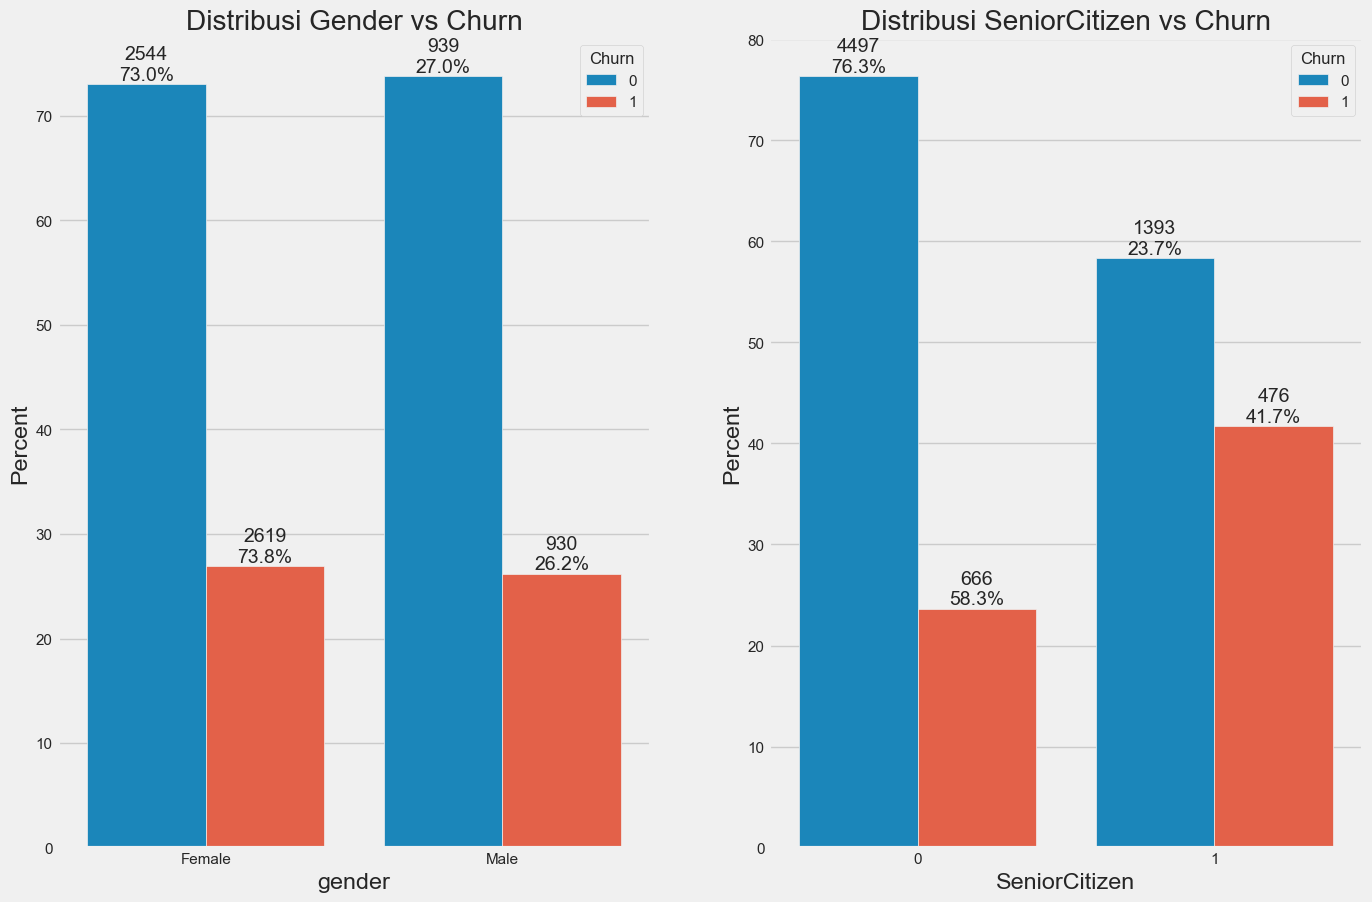

In [104]:
# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Grafik Gender vs Churn
axs[0].set_title('Distribusi Gender vs Churn')
gender_churn_count = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')
gender_churn_percent = df.groupby('gender')['Churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
sns.barplot(x='gender', y='Percent', hue='Churn', data=gender_churn_percent, ax=axs[0])
for i, p in enumerate(axs[0].patches):
    count = gender_churn_count.iloc[i]['Count']
    percent = gender_churn_percent.iloc[i]['Percent']
    axs[0].annotate(f"{count}\n{percent:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Grafik SeniorCitizen vs Churn
axs[1].set_title('Distribusi SeniorCitizen vs Churn')
senior_churn_count = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')
senior_churn_percent = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
sns.barplot(x='SeniorCitizen', y='Percent', hue='Churn', data=senior_churn_percent, ax=axs[1])
for i, p in enumerate(axs[1].patches):
    count = senior_churn_count.iloc[i]['Count']
    percent = senior_churn_percent.iloc[i]['Percent']
    axs[1].annotate(f"{count}\n{percent:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Menampilkan grafik
plt.show()

- Perputaran pelanggan untuk pelanggan pria & wanita sangat mirip satu sama lain!
- Demikian pula, jumlah pelanggan SeniorCitizen cukup rendah! Dari jumlah tersebut, kami dapat mengamati hampir sekitar 41% pelanggan SeniorCitizen yang berpindah. Ini menyumbang total 476 pelanggan dari 1142 pelanggan Senior Citizen. (666 + 476 = 1142)

#### Customer Account Information: Sekarang mari kita lihat masa tenure, contract

- Tenure: Setelah melihat histogram di bawah ini, kita dapat melihat bahwa banyak pelanggan yang baru bergabung dengan perusahaan telekomunikasi selama satu bulan, sementara cukup banyak juga yang sudah bergabung selama sekitar 72 bulan. Hal ini bisa jadi karena setiap pelanggan memiliki kontrak yang berbeda. Jadi, berdasarkan kontrak yang mereka miliki, bisa jadi lebih/kurang mudah bagi pelanggan untuk tetap tinggal/meninggalkan perusahaan telekomunikasi.

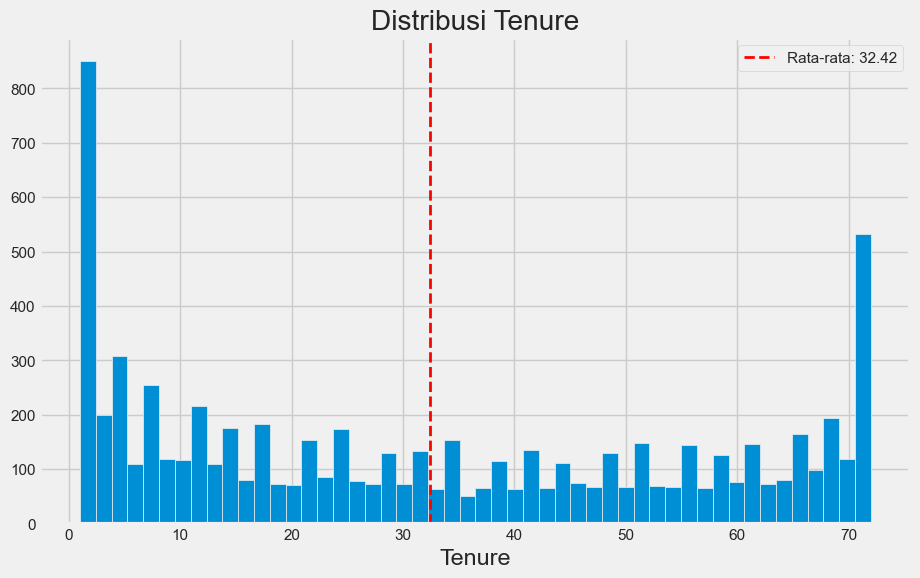

In [105]:
# membuat histogram tenure
plt.figure(figsize=(10,6))
df['tenure'].hist(bins=50)
mean_tenure = df['tenure'].mean()
plt.axvline(mean_tenure, color='red', linestyle='dashed', linewidth=2, label=f'Rata-rata: {mean_tenure:.2f}')
plt.title('Distribusi Tenure')
plt.xlabel('Tenure')
plt.legend()
plt.show()

Contracts: Untuk memahami grafik di atas, pertama-tama mari kita lihat jumlah pelanggan berdasarkan kontrak yang berbeda

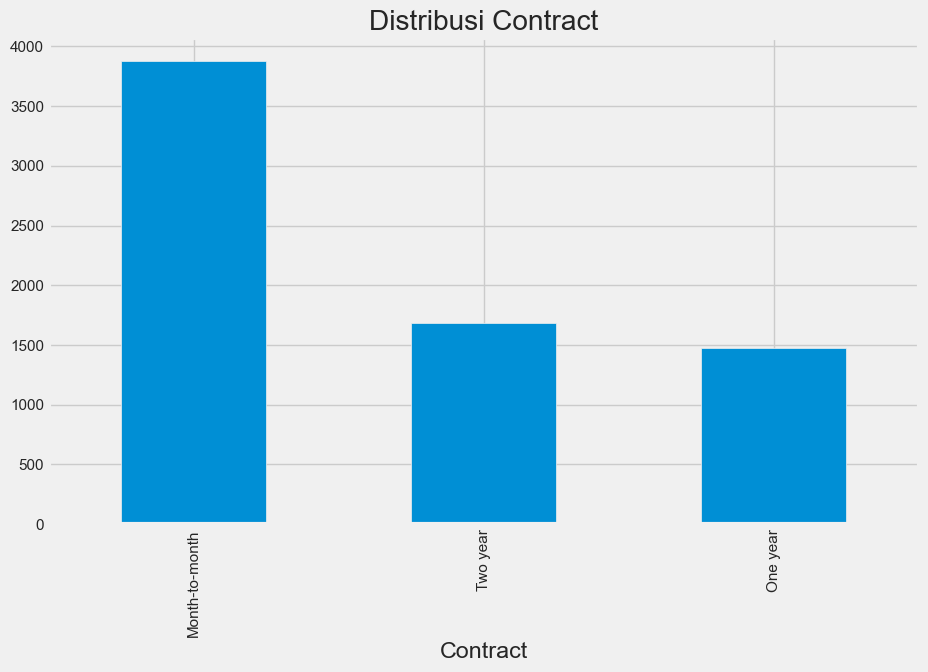

In [106]:
# membuat distribusi contract
plt.figure(figsize=(10,6))
df['Contract'].value_counts().plot(kind='bar')
plt.title('Distribusi Contract')
plt.xlabel('Contract')
plt.show()

Seperti yang bisa kita lihat dari grafik ini, sebagian besar pelanggan memiliki kontrak bulanan. Sementara ada jumlah pelanggan yang sama dalam kontrak 1 tahun dan 2 tahun.

Di bawah ini kami akan memahami masa kerja nasabah berdasarkan jenis kontrak mereka.

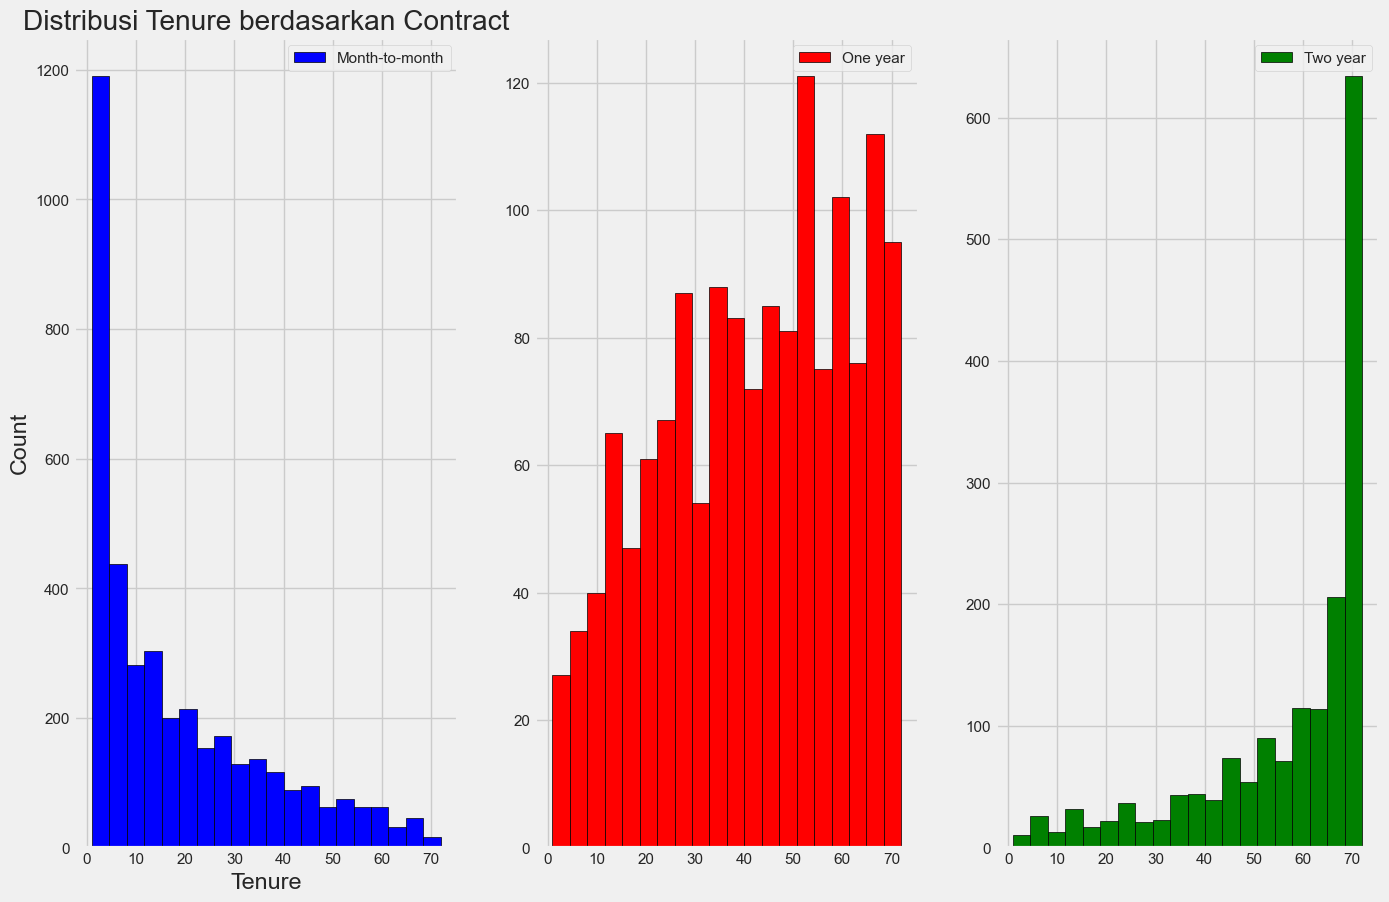

In [107]:
# membuat grafik tenure berdasarkan contract customer
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.set_title('Distribusi Tenure berdasarkan Contract')
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Count')
ax1.hist(df[df['Contract'] == 'Month-to-month']['tenure'], bins=20, color='blue', edgecolor='black', label='Month-to-month')
ax2.hist(df[df['Contract'] == 'One year']['tenure'], bins=20, color='red', edgecolor='black', label='One year')
ax3.hist(df[df['Contract'] == 'Two year']['tenure'], bins=20, color='green', edgecolor='black', label='Two year')
ax1.legend()
ax2.legend()
ax3.legend()


Menariknya, sebagian besar kontrak bulanan berlangsung selama 1-2 bulan, sementara kontrak 2 tahun cenderung berlangsung selama sekitar 70 bulan. Hal ini menunjukkan bahwa pelanggan yang mengambil kontrak yang lebih lama lebih loyal kepada perusahaan dan cenderung bertahan untuk jangka waktu yang lebih lama.

#### Sekarang mari kita lihat distribusi berbagai layanan yang digunakan oleh pelanggan

In [108]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


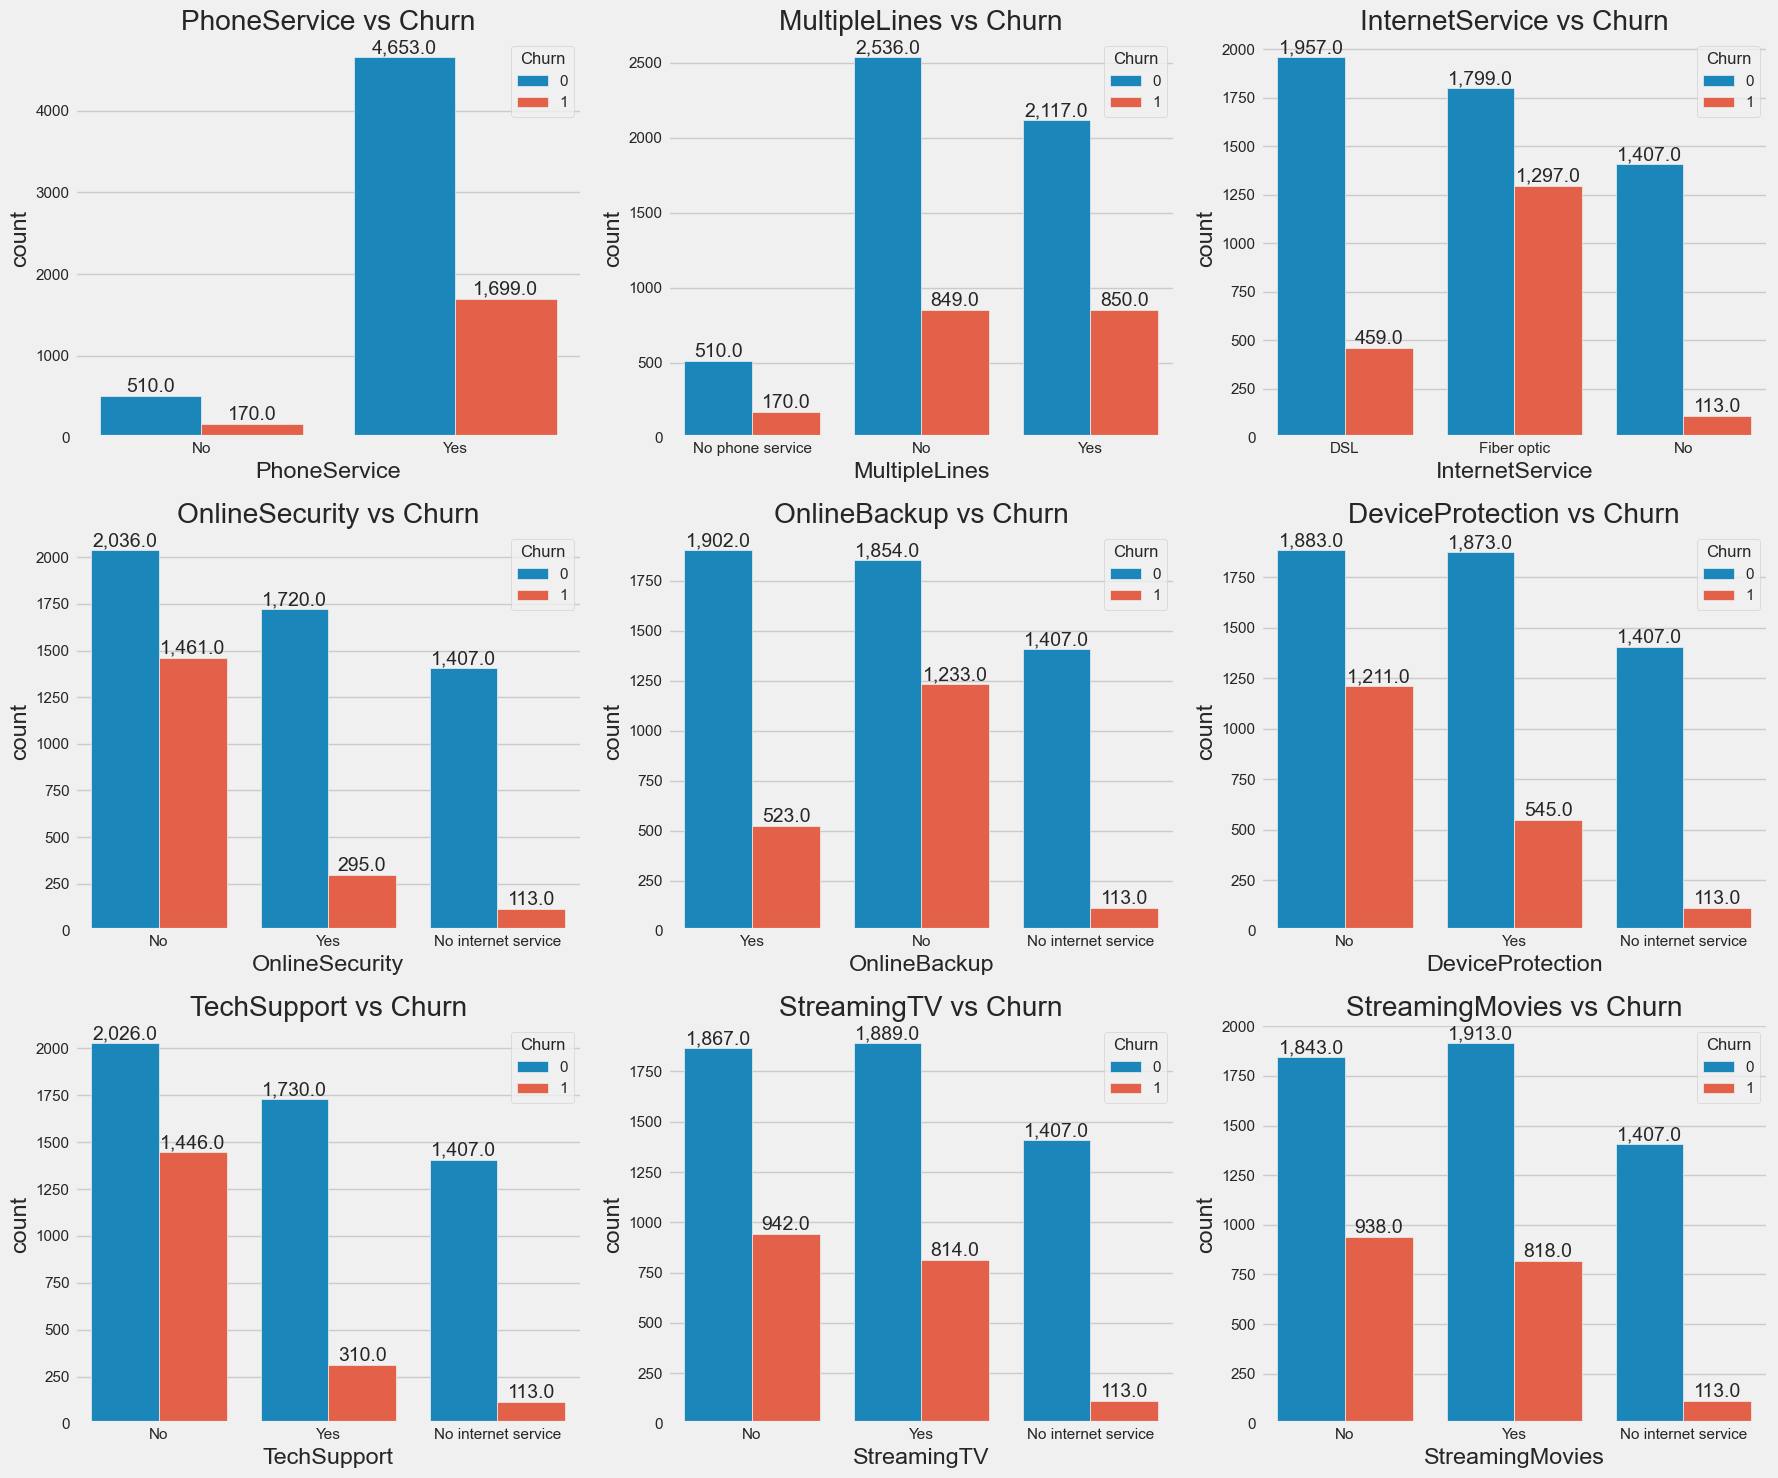

In [109]:
service = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axs = plt.subplots(len(service)//3, 3, figsize=(18, 15))

for i, col in enumerate(service):
    row = i // 3
    col_axs = i % 3
    axs[row, col_axs].set_title(f'{col} vs Churn')
    sns.countplot(x=col, hue='Churn', data=df, ax=axs[row, col_axs])
    axs[row, col_axs].set_xlabel(col)
    axs[row, col_axs].legend(title='Churn', loc='upper right')

    # Menambahkan jumlah value di setiap batang grafik
    total_height = len(df)
    for p in axs[row, col_axs].patches:
        height = p.get_height()
        axs[row, col_axs].annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                                   ha='center', va='bottom')

plt.tight_layout()
plt.show()


- Untuk Layanan Telepon, meskipun tidak memiliki layanan telepon, lebih banyak pelanggan yang dipertahankan dibandingkan dengan jumlah pelanggan yang meninggalkan layanan. 
- Dalam kasus MultipleLines, tingkat churn pada saat ada atau tidak ada MultipleLines adalah sama. 
- Sejumlah besar pelanggan telah menunjukkan penolakan mereka terhadap penggunaan kabel serat optik untuk menyediakan Layanan Internet. Sebaliknya, dari grafik di atas, pelanggan lebih memilih menggunakan DSL untuk InternetService mereka! 
- StreamingTV dan StreamingMovies menampilkan grafik yang sama. Terlepas dari berlangganan StreamingTV & StreamingMovies, banyak pelanggan yang berpindah. Sepertinya konten streaming tidak sepenuhnya salah!
- Ketika datang untuk melayani pelanggan, layanan OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport sangat penting dari visualisasi di atas! 
- Sejumlah besar pelanggan telah mengganti penyedia layanan mereka ketika layanan yang buruk dengan fitur-fitur yang disebutkan di atas.

#### Categorical Features vs Positive Target Variable (Churn Cases) :

- Sekarang kita akan mengarahkan perhatian kita langsung ke pelanggan yang Churn!
#### gender | SeniorCitizen | Partner | Dependents |

In [110]:
#gender
gender = df[df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Male/Female

#senior citizen
senior_citizen = df[df['Churn'] == 1]['SeniorCitizen'].value_counts()
senior_citizen = [senior_citizen[0] / sum(senior_citizen) * 100, senior_citizen[1] / sum(senior_citizen) * 100] # Yes/No

#dependents
dependents = df[df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100, dependents[1] / sum(dependents) * 100] # Yes/No

#partner
partner = df[df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100, partner[1] / sum(partner) * 100] # Yes/No



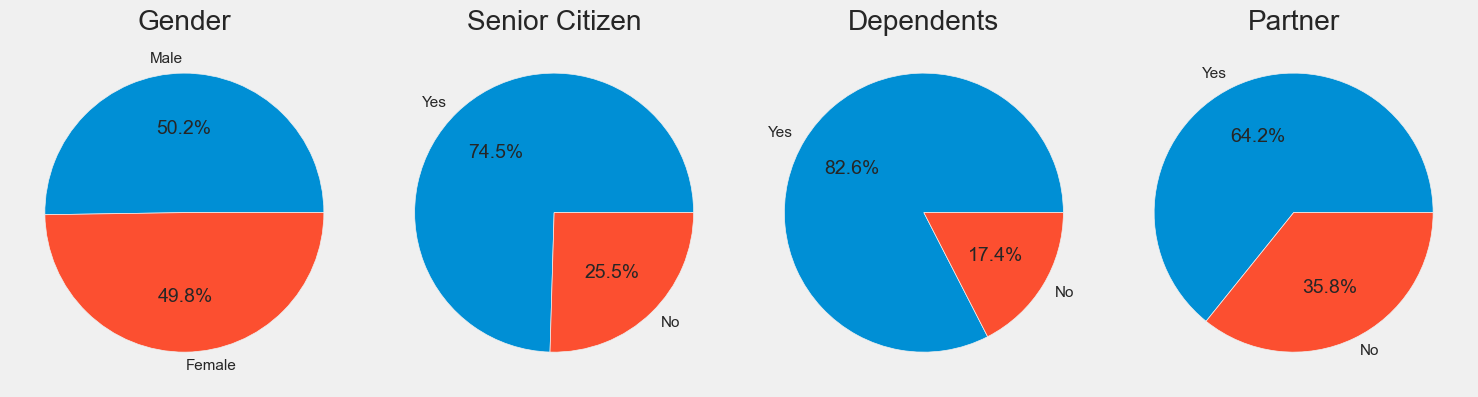

In [111]:
ax, fig = plt.subplots(nrows= 1, ncols= 4, figsize=(15, 10))

#gender chart
plt.subplot(1, 4, 1)
plt.pie(gender, labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Gender')

#Senior Citizen
plt.subplot(1, 4, 2)
plt.pie(senior_citizen, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Senior Citizen')

#Dependents
plt.subplot(1, 4, 3)
plt.pie(dependents, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Dependents')

#Partner
plt.subplot(1, 4, 4)
plt.pie(partner, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Partner')

plt.tight_layout()
plt.show()

- Kita dapat melihat dengan jelas perbedaan 50% - 50% antara pelanggan pria dan wanita yang telah berpindah layanan. Oleh karena itu, alasan untuk beralih adalah sesuatu yang berhubungan dengan layanan atau proses yang membuat pelanggan bereaksi buruk!
- 75% dari pelanggan yang keluar bukanlah SeniorCitizen! Ini adalah informasi utama yang perlu dialihkan perhatiannya oleh perusahaan!
- Pelanggan yang tinggal sendiri telah menghentikan layanan. Dari data Mitra & Tanggungan, rata-rata 64,2% pelanggan yang diputus layanannya adalah pelanggan yang tinggal sendiri.

#### PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [112]:
#PhoneService
phone_service = df[df['Churn'] == 1]['PhoneService'].value_counts()
phone_service = [phone_service[0] / sum(phone_service) * 100, phone_service[1] / sum(phone_service) * 100] # Yes/No

#MultipleLines
multiple_lines = df[df['Churn'] == 1]['MultipleLines'].value_counts()
multiple_lines = [multiple_lines[0] / sum(multiple_lines) * 100, multiple_lines[1] / sum(multiple_lines) * 100] # Yes/No

#InternetService
internet_service = df[df['Churn'] == 1]['InternetService'].value_counts()
internet_service = [internet_service[0] / sum(internet_service) * 100, internet_service[1] / sum(internet_service) * 100] # Yes/No

#StreamingTV
streaming_tv = df[df['Churn'] == 1]['StreamingTV'].value_counts()
streaming_tv = [streaming_tv[0] / sum(streaming_tv) * 100, streaming_tv[1] / sum(streaming_tv) * 100] # Yes/No

#StreamingMovies
streaming_movies = df[df['Churn'] == 1]['StreamingMovies'].value_counts()
streaming_movies = [streaming_movies[0] / sum(streaming_movies) * 100, streaming_movies[1] / sum(streaming_movies) * 100] # Yes/No

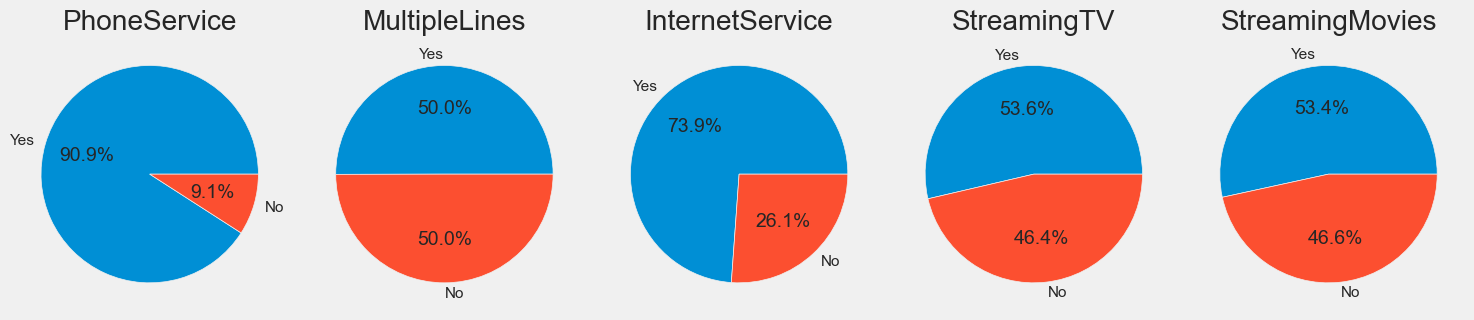

In [113]:
ax, fig = plt.subplots(nrows= 1, ncols= 5, figsize=(15, 10))

#PhoneService
plt.subplot(1, 5, 1)
plt.pie(phone_service, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('PhoneService')

#MultipleLines
plt.subplot(1, 5, 2)
plt.pie(multiple_lines, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('MultipleLines')

#InternetService
plt.subplot(1, 5, 3)
plt.pie(internet_service, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('InternetService')

#StreamingTV
plt.subplot(1, 5, 4)
plt.pie(streaming_tv, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('StreamingTV')

#StreamingMovies
plt.subplot(1, 5, 5)
plt.pie(streaming_movies, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('StreamingMovies')

plt.tight_layout()
plt.show()

- Meskipun menyediakan Layanan Telepon, sebagian besar pelanggan telah beralih!
- Demikian pula, ketersediaan MultipleLines tidak menjadi masalah, karena pelanggan tetap dapat berhenti berlangganan!
- Pelanggan jelas tidak menghargai pendekatan kabel Fiber Optic untuk menyediakan layanan Internet dengan 70% memilih keluar dari layanan!
- Untuk StreamingTV & StreamingMovies, pelanggan yang tidak memiliki layanan ini pasti membatalkan langganan mereka, namun rata-rata 53,6% pelanggan beralih meskipun telah mengkonsumsi konten streaming.

#### OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [114]:
#OnlineSecurity
online_security = df[df['Churn'] == 1]['OnlineSecurity'].value_counts()
online_security = [online_security[0] / sum(online_security) * 100, online_security[1] / sum(online_security) * 100, online_security[2] / sum(online_security) * 100] #No/Yes/No internet service

#OnlineBackup
online_backup = df[df['Churn'] == 1]['OnlineBackup'].value_counts()
online_backup = [online_backup[0] / sum(online_backup) * 100, online_backup[1] / sum(online_backup) * 100, online_backup[2] / sum(online_backup) * 100] # No/Yes/No internet service

#DeviceProtection
device_protection = df[df['Churn'] == 1]['DeviceProtection'].value_counts()
device_protection = [device_protection[0] / sum(device_protection) * 100, device_protection[1] / sum(device_protection) * 100, device_protection[2] / sum(device_protection) * 100] # No/Yes/No internet service

#TechSupport
tech_support = df[df['Churn'] == 1]['TechSupport'].value_counts()
tech_support = [tech_support[0] / sum(tech_support) * 100, tech_support[1] / sum(tech_support) * 100, tech_support[2] / sum(tech_support) * 100] # No/Yes/No internet service

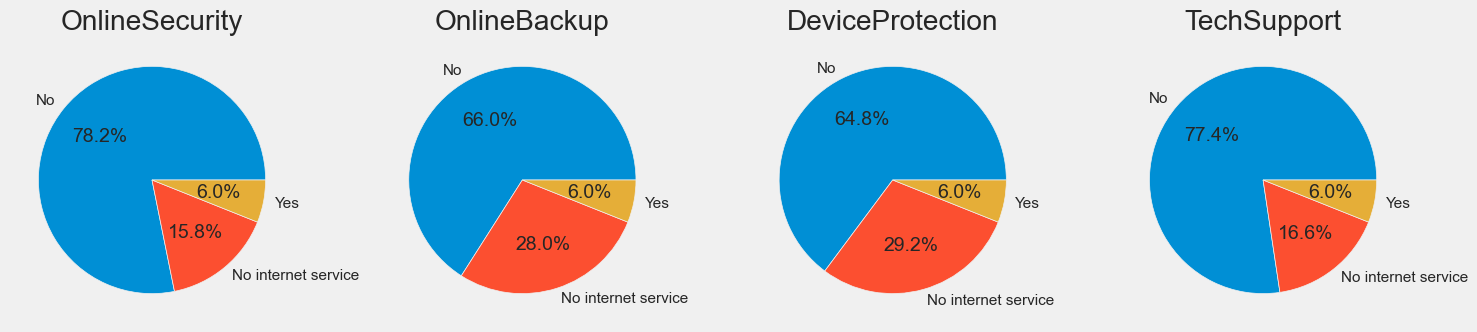

In [115]:
ax, fig = plt.subplots(nrows= 1, ncols= 4, figsize=(15, 10))

#OnlineSecurity
plt.subplot(1, 4, 1)
plt.pie(online_security, labels=['No', 'No internet service', 'Yes'], autopct='%1.1f%%')
plt.title('OnlineSecurity')

#OnlineBackup
plt.subplot(1, 4, 2)
plt.pie(online_backup, labels=['No', 'No internet service', 'Yes'], autopct='%1.1f%%')
plt.title('OnlineBackup')

#DeviceProtection
plt.subplot(1, 4, 3)
plt.pie(device_protection, labels=['No', 'No internet service', 'Yes'], autopct='%1.1f%%')
plt.title('DeviceProtection')

#TechSupport
plt.subplot(1, 4, 4)
plt.pie(tech_support, labels=['No', 'No internet service', 'Yes'], autopct='%1.1f%%')
plt.title('TechSupport')

plt.tight_layout()
plt.show()

- Diagram lingkaran di atas menekankan pentingnya menyediakan OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport karena rata-rata 71,6% pelanggan menghentikan layanan mereka karena kurangnya fitur-fitur ini!

In [32]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

####  Contract | PaperlessBilling | PaymentMethod |

In [116]:
#Contract
contract = df[df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month, One year, Two year

#PaperlessBilling
paperless_billing = df[df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperless_billing = [paperless_billing[0] / sum(paperless_billing) * 100, paperless_billing[1] / sum(paperless_billing) * 100] # Yes/No

#PaymentMethod
payment_method = df[df['Churn'] == 1]['PaymentMethod'].value_counts()
payment_method = [payment_method[0] / sum(payment_method) * 100, payment_method[1] / sum(payment_method) * 100, payment_method[2] / sum(payment_method) * 100, payment_method[3] / sum(payment_method) * 100] # Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)


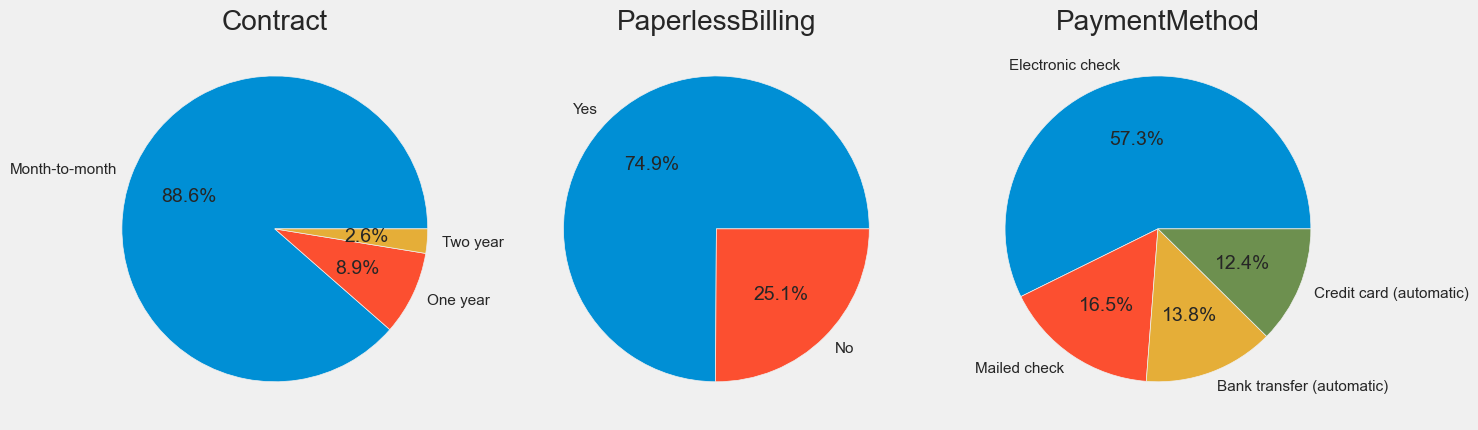

In [117]:
ax, fig = plt.subplots(nrows= 1, ncols= 3, figsize=(15, 10))

#Contract
plt.subplot(1, 3, 1)
plt.pie(contract, labels=['Month-to-month', 'One year', 'Two year'], autopct='%1.1f%%')
plt.title('Contract')

#PaperlessBilling
plt.subplot(1, 3, 2)
plt.pie(paperless_billing, labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('PaperlessBilling')

#PaymentMethod
plt.subplot(1, 3, 3)
plt.pie(payment_method, labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], autopct='%1.1f%%')
plt.title('PaymentMethod')

plt.tight_layout()
plt.show()

- Durasi Kontrak Bulanan memiliki pangsa yang mendominasi dalam hal omset dengan 88,6% pelanggan!
- Penagihan tanpa kertas tampaknya tidak dihargai oleh pelanggan!
- Cek elektronik perlu diurutkan karena menyumbang 57,3% dari churn. Kemudian diikuti oleh Cek melalui pos, Transfer Bank (otomatis) & Kartu Kredit (otomatis)!

#### Distribution Numerical Values

In [118]:
# mencari numerical values
numerical_values = ['tenure', 'MonthlyCharges', 'TotalCharges']

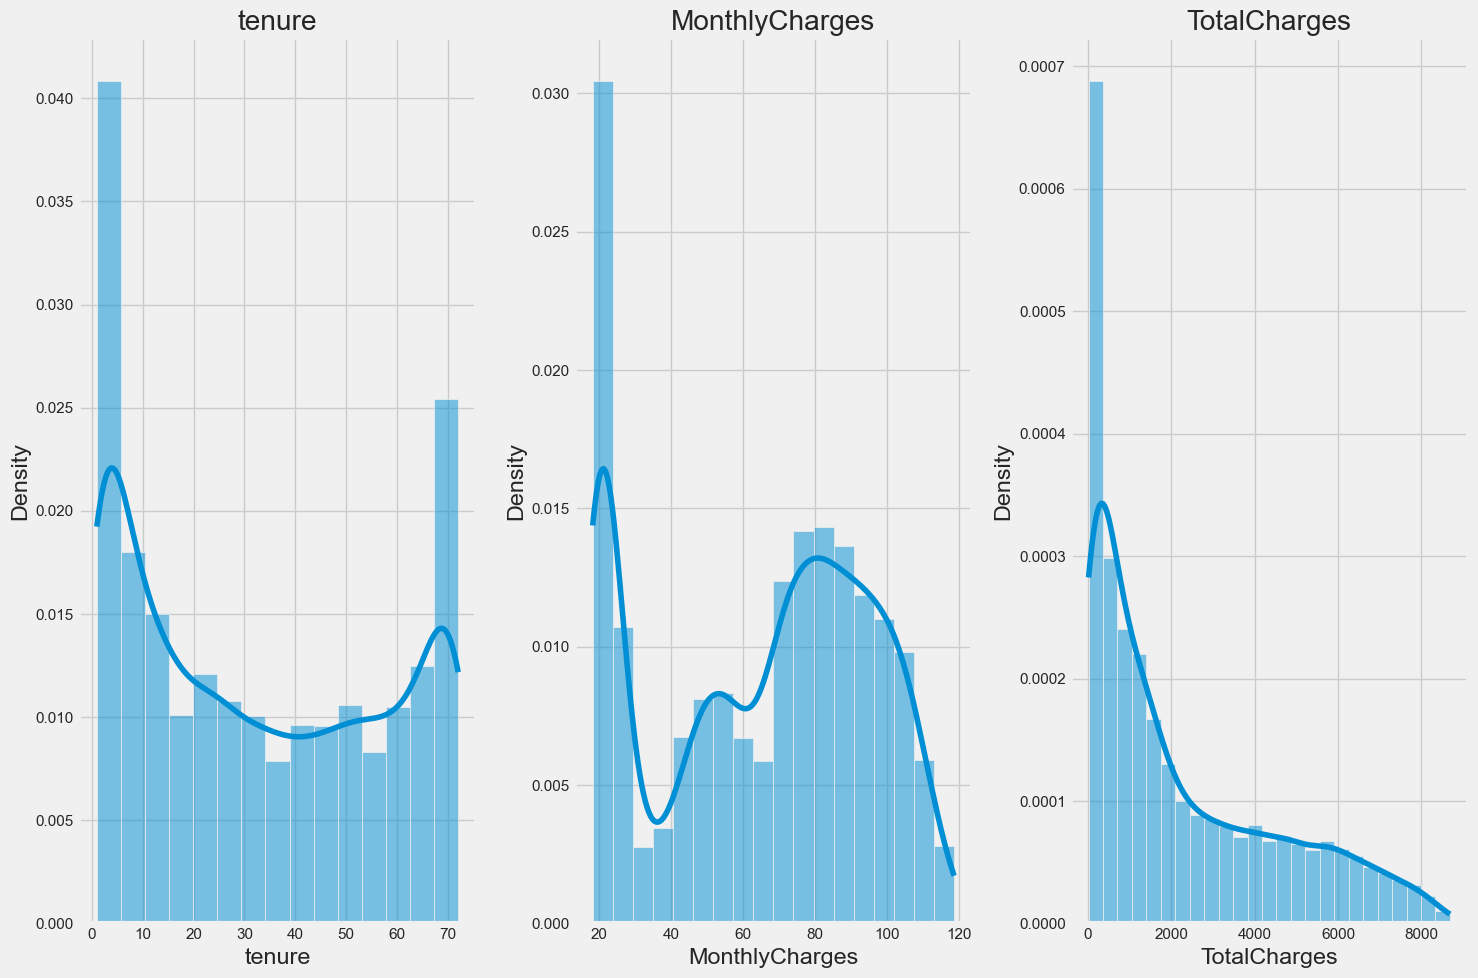

In [119]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

for i in range(len(numerical_values)):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[numerical_values[i]], ax=ax[i], kde=True, stat="density")
    ax[i].set_title(numerical_values[i])
plt.tight_layout()
plt.show()

- tenor dan MonthlyCharges membuat distribusi bimodal dengan puncaknya masing-masing pada 0 - 70 dan 20 - 80. 
- TotalCharges menampilkan distribusi yang condong ke kiri atau ke kanan.

#### Numerical Values vs target

<function matplotlib.pyplot.show(close=None, block=None)>

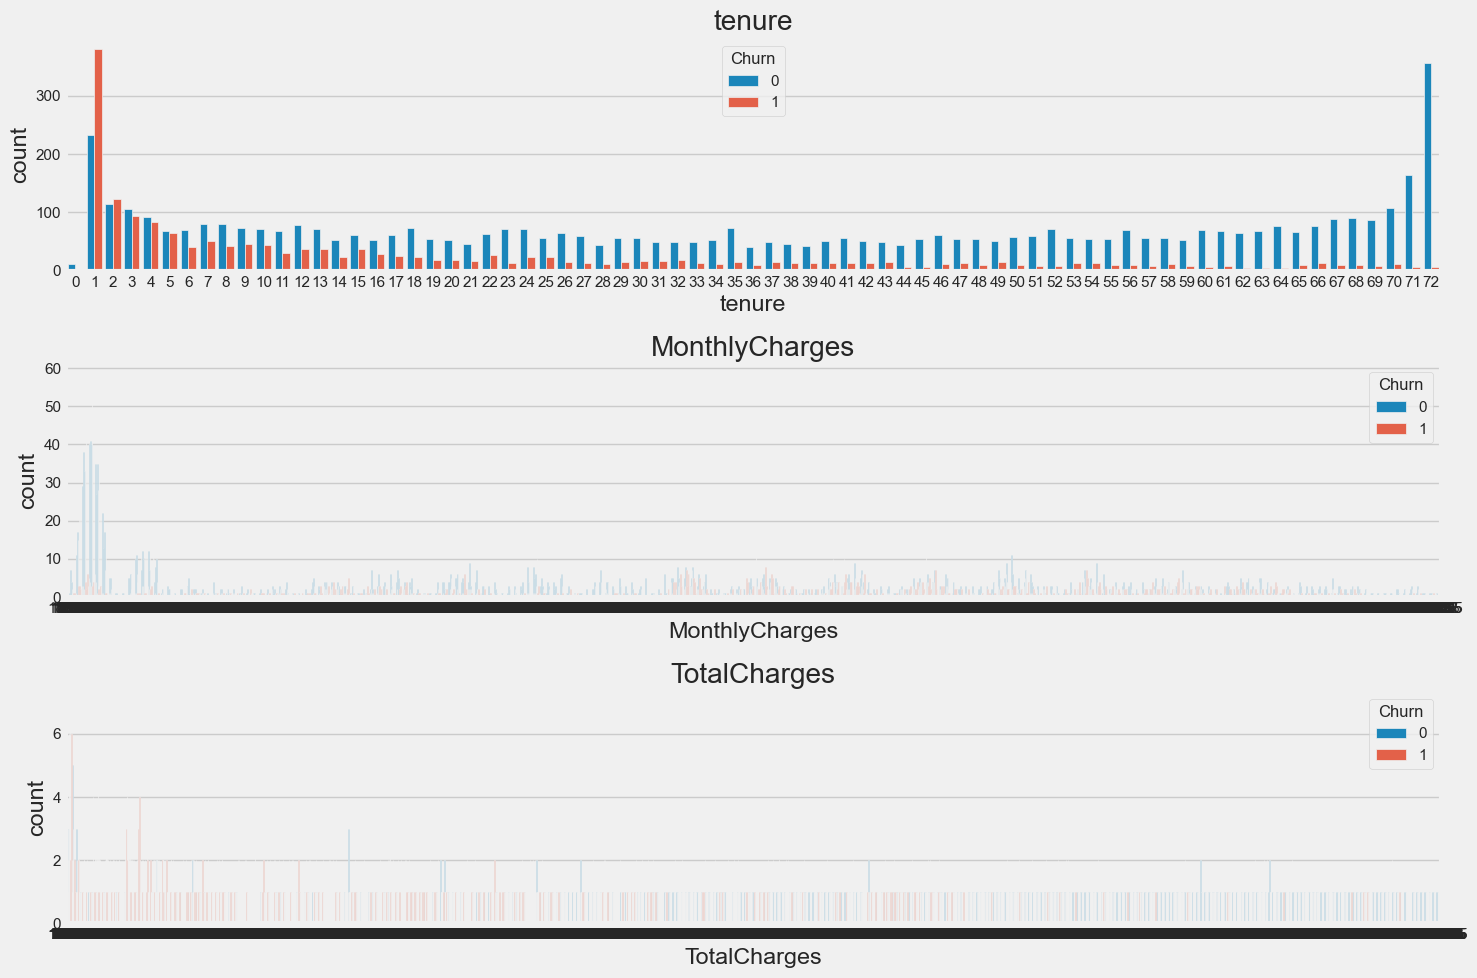

In [55]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

for i in range(len(numerical_values)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=numerical_values[i], data=df, hue='Churn', ax=ax[i])
    ax[i].set_title(numerical_values[i])
plt.tight_layout()
plt.show

- Mempertimbangkan masa berlangganan, sejumlah besar pelanggan keluar setelah bulan pertama. Pembatalan layanan yang tinggi ini berlanjut selama 4 - 5 bulan, tetapi pelanggan yang keluar telah berkurang sejak bulan pertama. Seiring dengan bertambahnya masa tenor, pelanggan yang berhenti berlangganan berkurang.
- Hal ini menghasilkan churn pelanggan yang rendah seiring dengan bertambahnya masa tenor. Grafik ini menampilkan grafik simetris dengan sisi kiri mendominasi dengan angka churn dan sisi kanan mendominasi dengan angka churn yang rendah.
- Karena terlalu banyak titik data unik di MonthlyCharges & TotalCharges, sulit untuk mendapatkan wawasan apa pun. Oleh karena itu, kami akan menskalakan fitur numerik ini untuk visualisasi yang dapat dimengerti dan tujuan mendapatkan wawasan. Hal ini akan membawa titik data yang bervariasi ke nilai konstan yang mewakili rentang nilai.
- Di sini, kami membagi titik data dari fitur numerik dengan 5 atau 500 dan menetapkan nilai hasil bagi sebagai konstanta representatif untuk titik data tersebut. Konstanta penskalaan diputuskan dengan melihat data & intuisi.

In [120]:
df3 = df.copy()
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


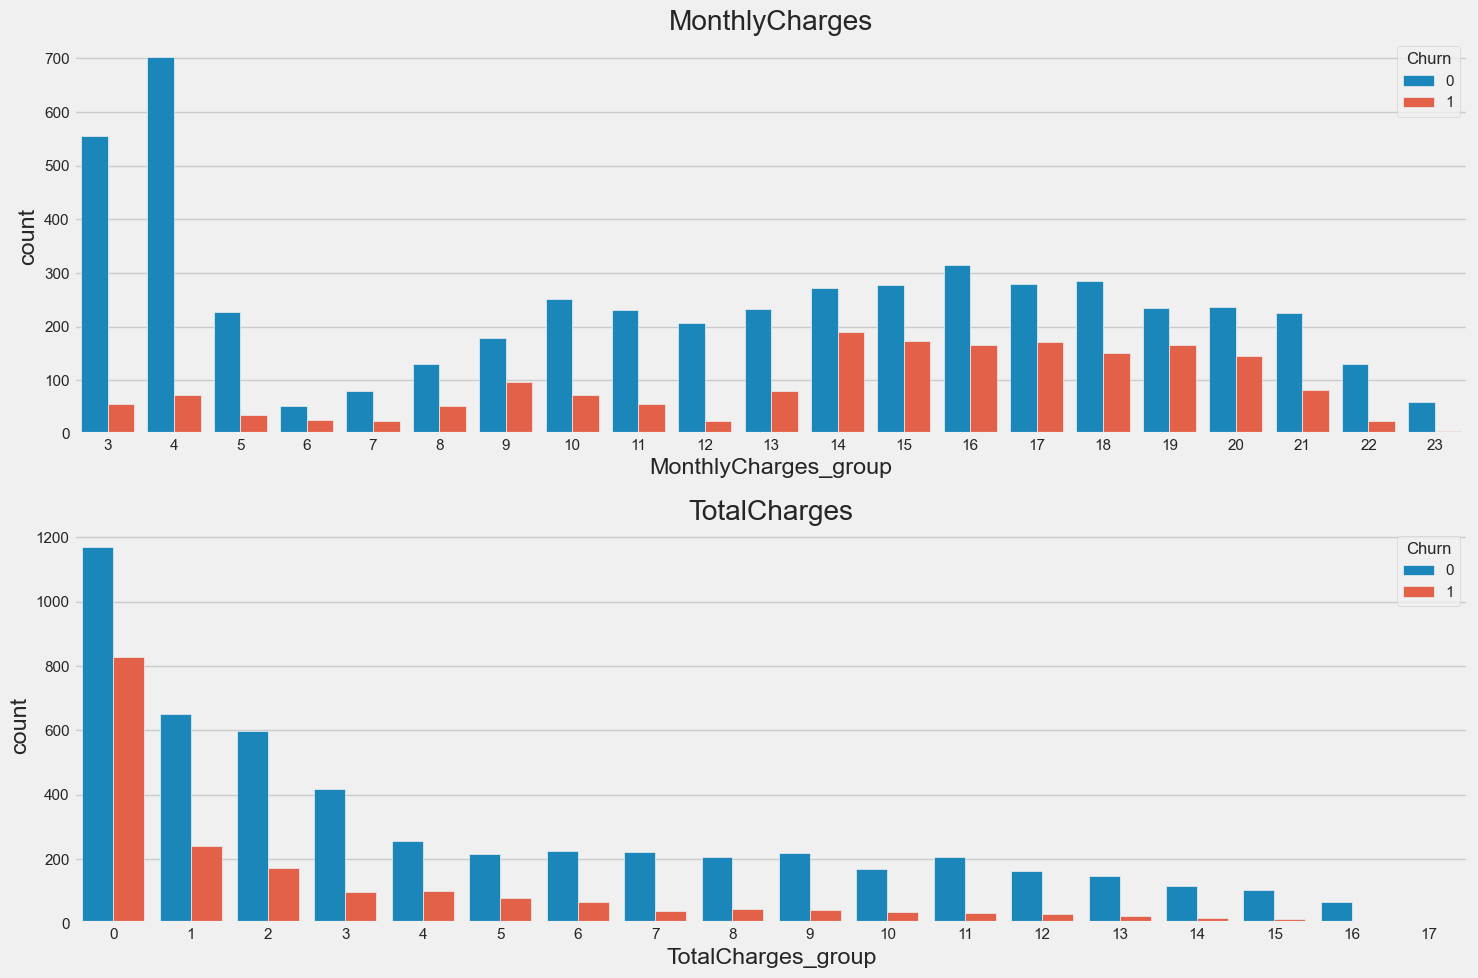

In [121]:
df3['MonthlyCharges_group'] = [int(i / 5) for i in df3['MonthlyCharges']]
df3['TotalCharges_group'] = [int(i / 500) for i in df3['TotalCharges'].fillna(0)]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
for i in range(len(numerical_values[1:])):
    plt.subplot(2, 1, i+1)
    sns.countplot(x=numerical_values[1+i] + '_group', data=df3, hue='Churn', ax=ax[i])
    ax[i].set_title(numerical_values[i+1])
plt.tight_layout()
plt.show()

- Untuk kelompok MonthlyCharges, tingkat churn tinggi untuk nilai antara 65 (13x5) - 105 (21x5). Kisaran nilai MonthlyCharges ini menyebabkan pelanggan beralih.
- Sejumlah besar pelanggan memilih keluar dari layanan untuk TotalCharges di bawah 500. Perputaran pelanggan ini terus berlanjut untuk rentang nilai TotalBiaya dari 0 (0x500) - 1000 (2x500).

In [122]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group,TotalCharges_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,5,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,11,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,10,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,8,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,14,0


## -- Modeling --

In [123]:
# hapus kolom customerID 
df4 = df.copy()
df4.drop('customerID', axis=1, inplace=True)

#### Spliting Dataset

In [124]:
X = df4.drop(columns="Churn")
y = df4['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

#### Training and Modeling (Data Real belum di sampling)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [127]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [128]:
rsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [129]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ["tenure", "MonthlyCharges", "TotalCharges"]),
    ('categoric', cat_pipe(encoder='onehot'), ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                              'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                               'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])



model = RandomizedSearchCV(pipeline, rsp.logreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 44.75040191350916, 'algo__fit_intercept': False}
0.8046222222222222 0.8035555555555556 0.8002842928216063


In [132]:
# mencetak akurasi model, best model, best score, score training
print("Best Parameter yang dipakai", model.best_params_)
print("Best Score Training : ", model.score(X_train, y_train))
print("Best Score Model : ", model.best_score_)
print("Best Score Test : ", model.score(X_test, y_test))

Best Parameter yang dipakai {'algo__C': 44.75040191350916, 'algo__fit_intercept': False}
Best Score Training :  0.8046222222222222
Best Score Model :  0.8035555555555556
Best Score Test :  0.8002842928216063


In [133]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve

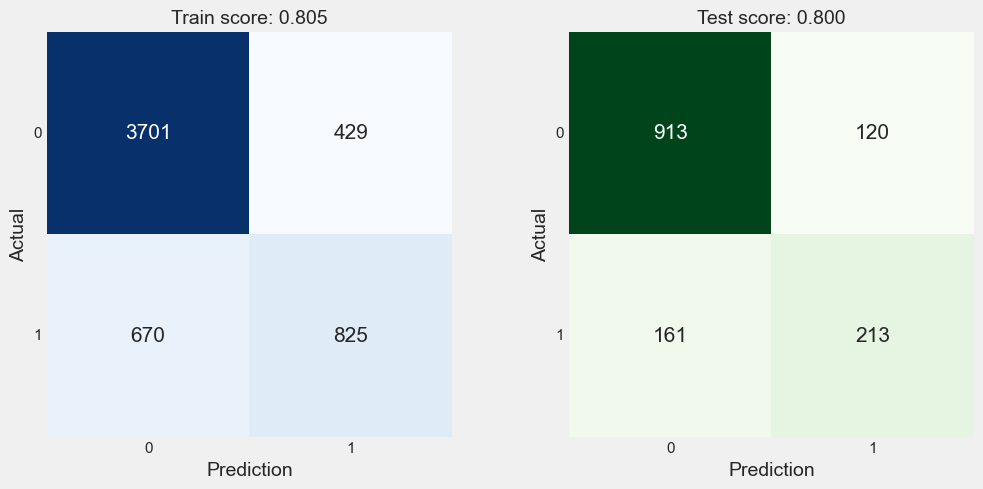

In [134]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## -- Evaluation --

In [135]:
# plot_classification_report
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.74      5625
weighted avg       0.80      0.80      0.80      5625


Test report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



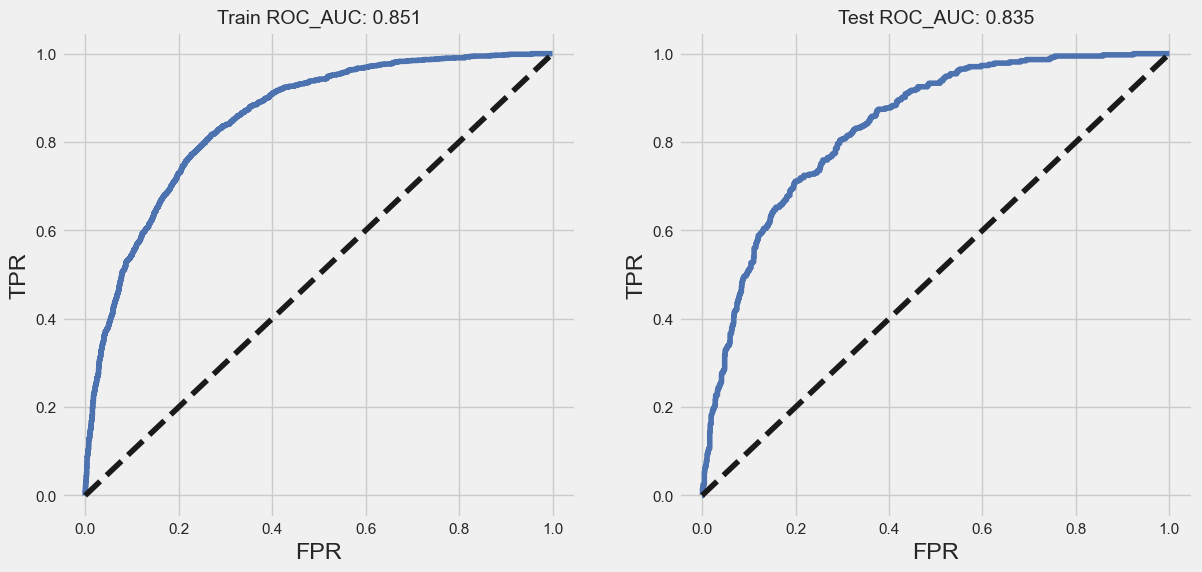

In [137]:
# Plot ROC
plot_roc_curve(X_train, y_train, X_test, y_test, model)

### Kesimpulan

data real tanpa adanya sampling ulang akurasinya cukup bagus dengan data target yang sangat jomplang yaitu 0/No Churn = 73,4% dan 1/Yes Churn = 26,6% dengan score akurasi
- Test 80%
- train 80%

#### Save model dan Testing Model

In [ ]:
df5 = df.copy()

In [146]:
# testing model
predict = model.predict(df5)

In [147]:
# Mengubah hasil prediksi menjadi label "No Churn" dan "Churn"
labels = ['No Churn', 'Churn']
pred_label = [labels[pred] for pred in predict]

# Menambahkan kolom hasil prediksi ke DataFrame
df['prediction'] = pred_label

In [149]:
probabilty = model.predict_proba(df5)
df5['Probability'] = probabilty[:, 1]

In [150]:
df5.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction,Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Churn,0.626158
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,No Churn,0.040360
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,No Churn,0.296844
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,No Churn,0.025206
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Churn,0.684254


In [153]:
# export ke csv
df.to_csv('Data/churn_prediction.csv', index=False)

In [1]:
# save Model
import pickle

In [155]:
# Simpan model prediksi ke dalam file
with open('Churn_prediction_telco.pkl', 'wb') as file:
    pickle.dump(model, file)

In [3]:
# Memuat model prediksi dari file
with open('Churn_prediction_telco.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [9]:
# Melakukan prediksi pada data baru
new_data = pd.read_csv('Data/Telco-Customer-Churn.csv')  # Data baru yang ingin diprediksi
new_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# menghapus data yang kosong ' ' di TotalCharges
new_data['TotalCharges'] = new_data['TotalCharges'].replace(' ', np.nan)
new_data[new_data['TotalCharges'] == ' ']
new_data.dropna(subset=['TotalCharges'], inplace=True)

In [29]:
predictions = loaded_model.predict(new_data)

In [16]:
# Mengubah hasil prediksi menjadi label "No Churn" dan "Churn"
labels = ['No Churn', 'Churn']
pred_label = [labels[pred] for pred in predictions]

# Menambahkan kolom hasil prediksi ke DataFrame
new_data['prediction'] = pred_label

In [23]:
probability = loaded_model.predict_proba(new_data)
new_data['Probability'] = np.round(probability[:, 1], 2)
new_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction,Probability
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Churn,0.63
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,No Churn,0.04
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No Churn,0.30
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No Churn,0.03
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Churn,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,No Churn,0.11
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,No Churn,0.15
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No Churn,0.40
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Churn,0.71


In [24]:
# export ke csv
new_data.to_csv('Data/churn_prediction_baru.csv', index=False)

In [28]:
new_data[new_data['Probability'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction,Probability
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962,No,No Churn,0.0
68,3170-NMYVV,Female,0,Yes,Yes,50,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.15,930.9,No,No Churn,0.0
73,8028-PNXHQ,Male,0,Yes,Yes,62,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.25,1424.6,No,No Churn,0.0
87,1862-QRWPE,Female,0,Yes,Yes,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1057,No,No Churn,0.0
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No,No Churn,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0508-SQWPL,Female,0,Yes,Yes,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.10,1087.7,No,No Churn,0.0
6940,2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),55.65,3880.05,No,No Churn,0.0
6942,3454-JFUBC,Male,1,No,No,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.00,1396,No,No Churn,0.0
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No,No Churn,0.0
